In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
pd.set_option("display.max_columns", None)

# Load data
df = pd.read_csv("../data/raw/data.csv")

df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## 2. Dataset Overview
Shape and Structure

In [2]:
df.shape

(95662, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

## 3. Summary Statistics (Numerical Features)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


## 4. Distribution of Numerical Features
Transaction Amount & Value

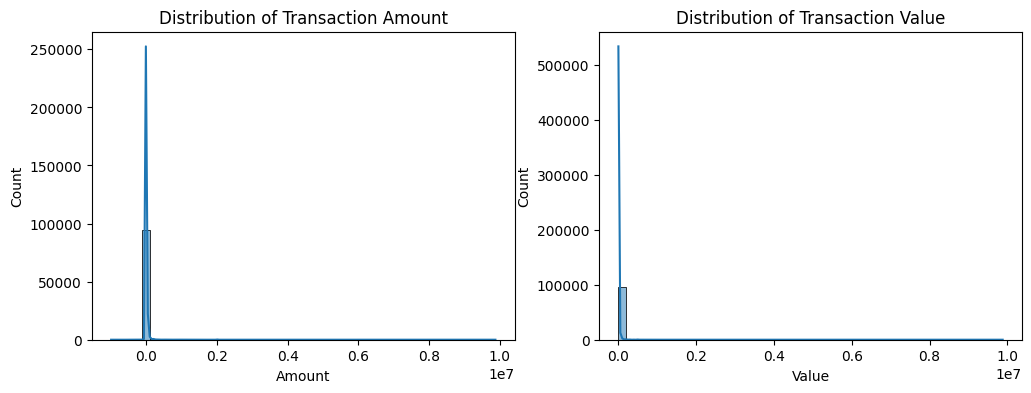

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df["Amount"], bins=50, kde=True, ax=ax[0])
ax[0].set_title("Distribution of Transaction Amount")

sns.histplot(df["Value"], bins=50, kde=True, ax=ax[1])
ax[1].set_title("Distribution of Transaction Value")

plt.show()


## 5. Distribution of Categorical Features
Channel Usage

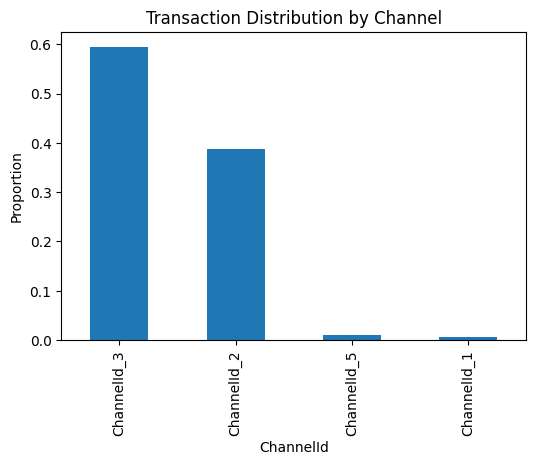

In [6]:
df["ChannelId"].value_counts(normalize=True).plot(kind="bar", figsize=(6,4))
plt.title("Transaction Distribution by Channel")
plt.ylabel("Proportion")
plt.show()


Product Categories

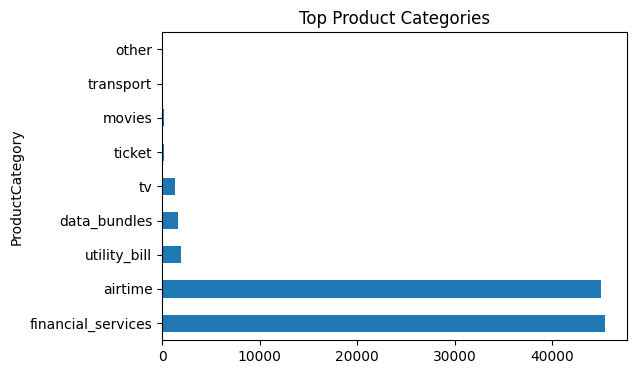

In [7]:
df["ProductCategory"].value_counts().head(10).plot(kind="barh", figsize=(6,4))
plt.title("Top Product Categories")
plt.show()


## 6. Correlation Analysis

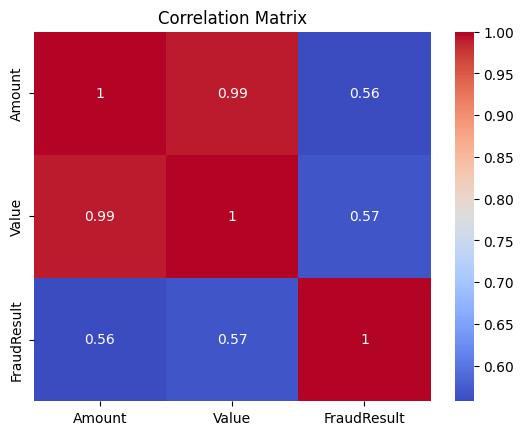

In [8]:
corr = df[["Amount", "Value", "FraudResult"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## 7. Missing Value Analysis

In [9]:
df.isnull().sum().sort_values(ascending=False)


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

Visualize:

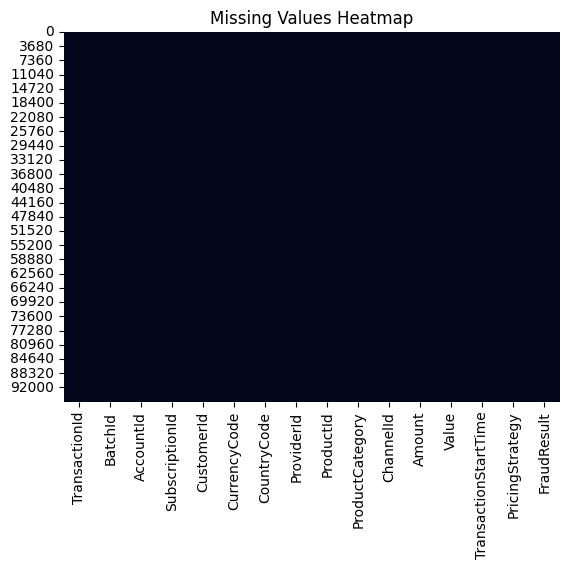

In [10]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


## 8. Outlier Detection
Boxplots

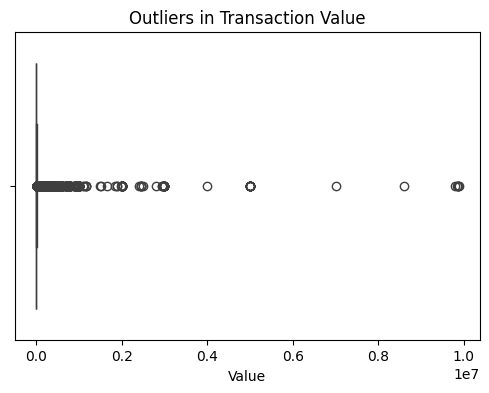

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Value"])
plt.title("Outliers in Transaction Value")
plt.show()


## 9. Behavioral Aggregation Preview (Customer-Level)

In [12]:
customer_summary = df.groupby("CustomerId").agg(
    transaction_count=("TransactionId", "count"),
    total_amount=("Amount", "sum"),
    avg_amount=("Amount", "mean")
)

customer_summary.describe().T


,count,mean,std,min,25%,50%,75%,max
transaction_count,3742.0,25.564404,9.692960e+01,1.0,2.0000,7.000000,20.000000,4.091000e+03
total_amount,3742.0,171737.740647,2.717305e+06,-104900000.0,4077.4375,20000.000000,79967.750000,8.345124e+07
avg_amount,3742.0,15715.616012,1.676991e+05,-425000.0,1000.0000,2583.846429,4877.613636,8.601821e+06
